In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import sklearn.linear_model as lm
from keras.models import Sequential,load_model
from keras.layers import Dense,Reshape,advanced_activations
from keras.constraints import nonneg
import numpy as np
%matplotlib inline
import tensorflow
import keras
import math
import time
import datetime
from sklearn import cluster, datasets, metrics

Using TensorFlow backend.


In [2]:
np.random.seed(15)

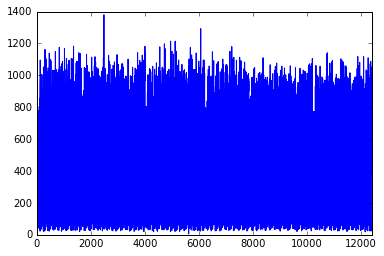

In [6]:
dfnh = pd.read_csv('cluster_01.csv')
dfnhc =dfnh.copy()

alweneed =(dfnhc['當量'].mean()+(dfnhc['當量'].std())*3)
dfnhc['當量'].where(dfnhc['當量']<=alweneed,alweneed, inplace=True)
dfnhc['當量']=dfnhc['當量']
dfnhc['當量'].plot()

In [49]:
# dfnhc

In [7]:
def clean(inp):
    outp = inp.ix[:,[0,3,4,5,6,8,9,10,7]].copy()
    outp.columns = ['a','b','c','d','e','f','g','h','i'];outp
    outp.i=outp.i/10;outp
    outp.h=outp.h/10;outp
    outp.replace(to_replace='西',value=2,inplace=True );outp
    outp.replace(to_replace='東',value=1,inplace=True );outp
    outp.replace(to_replace='VSPRA60',value=1,inplace=True );outp
    outp.replace(to_replace='VS7SN60',value=2,inplace=True );outp
    outp.d = pd.to_datetime(outp.d);
    outp['weekday'] = outp['d'].dt.dayofweek;outp
    outp.d= outp.d.dt.dayofyear;outp
    outp.replace(to_replace='00:00:00',value=0,inplace=True );outp
    outp.replace(to_replace='01:00:00',value=1,inplace=True );outp
    outp.replace(to_replace='02:00:00',value=2,inplace=True );outp
    outp.replace(to_replace='03:00:00',value=3,inplace=True );outp
    outp.replace(to_replace='04:00:00',value=4,inplace=True );outp
    outp.replace(to_replace='05:00:00',value=5,inplace=True );outp
    outp.replace(to_replace='06:00:00',value=6,inplace=True );outp
    outp.replace(to_replace='07:00:00',value=7,inplace=True );outp
    outp.replace(to_replace='08:00:00',value=8,inplace=True );outp
    outp.replace(to_replace='09:00:00',value=9,inplace=True );outp
    outp.replace(to_replace='10:00:00',value=10,inplace=True );outp
    outp.replace(to_replace='11:00:00',value=11,inplace=True );outp
    outp.replace(to_replace='12:00:00',value=12,inplace=True );outp
    outp.replace(to_replace='13:00:00',value=13,inplace=True );outp
    outp.replace(to_replace='14:00:00',value=14,inplace=True );outp
    outp.replace(to_replace='15:00:00',value=15,inplace=True );outp
    outp.replace(to_replace='16:00:00',value=16,inplace=True );outp
    outp.replace(to_replace='17:00:00',value=17,inplace=True );outp
    outp.replace(to_replace='18:00:00',value=18,inplace=True );outp
    outp.replace(to_replace='19:00:00',value=19,inplace=True );outp
    outp.replace(to_replace='20:00:00',value=20,inplace=True );outp
    outp.replace(to_replace='21:00:00',value=21,inplace=True );outp
    outp.replace(to_replace='22:00:00',value=22,inplace=True );outp
    outp.replace(to_replace='23:00:00',value=23,inplace=True );outp
    cols =outp.columns.tolist()
    outp= outp[cols[:3]+cols[-1:]+cols[3:-1]];outp
    outp.columns = ['a','b','c','d','e','f','g','h','i','j'];outp
    outpp = outp.values
    outpp = outpp.astype('float32')
    
    
    train_size = int(len(outpp[:-144]) * 0.75)
    test_size = len(outpp[:-144]) - train_size
    train, test = outpp[:-144][0:train_size,:], outpp[:-144][train_size:len(outpp),:]
    return train, test
    
    
    

In [10]:
pd.DataFrame(cluster01tra)

,0,1,2,3,4,5,6,7,8,9
0,1.0,2.0,2.0,4.0,92.0,0.0,57.641605,1.000,14.404001,21.964285
1,1.0,2.0,2.0,4.0,92.0,1.0,58.200558,0.675,16.250000,12.650000
2,1.0,2.0,2.0,4.0,92.0,2.0,57.625000,0.510,17.625000,7.250000
3,1.0,2.0,2.0,4.0,92.0,3.0,56.131489,0.325,20.025000,5.035714
4,1.0,2.0,2.0,4.0,92.0,4.0,58.712292,0.255,20.716999,3.500000
5,1.0,2.0,2.0,4.0,92.0,5.0,56.555332,0.330,19.766500,4.500000
6,1.0,2.0,2.0,4.0,92.0,6.0,57.948292,0.445,18.391500,7.650000
7,1.0,2.0,2.0,4.0,92.0,7.0,57.534691,1.335,15.465000,29.400000
8,1.0,2.0,2.0,4.0,92.0,8.0,52.337563,5.580,11.469000,77.000000
9,1.0,2.0,2.0,4.0,92.0,9.0,48.518032,7.670,9.038500,93.750000


In [8]:
dfnhc01=dfnhc.where((dfnhc['VD編號']== 'VSPRA60')&( dfnhc['方向']=='西')).dropna().copy();dfnhc01
dfnhc02=dfnhc.where((dfnhc['VD編號']== 'VS7SN60')&( dfnhc['方向']=='西')).dropna().copy();dfnhc02


dfnhc01ctra, dfnhc01ctes= clean(dfnhc01);
dfnhc02ctra, dfnhc02ctes= clean(dfnhc02);


cluster01tra = []
cluster01tes = []
#train
for ele in dfnhc01ctra.tolist():
    cluster01tra.append(ele)
for ele2 in dfnhc02ctra.tolist():
    cluster01tra.append(ele2)
cluster01tra=np.array(cluster01tra)
print len(cluster01tra)
#test
for ele3 in dfnhc01ctes.tolist():
    cluster01tes.append(ele3)
for ele4 in dfnhc02ctes.tolist():
    cluster01tes.append(ele4)
cluster01tes=np.array(cluster01tes)
print  len(cluster01tes)
    

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(0,len(dataset)-look_back-1,look_back):
        a = dataset[i:(i+look_back), 0:nort]
        dataX.append(a)
        dataY.append(dataset[i + look_back:i+look_back+look_back, nort-1])
#     return dataX,dataY
    return np.array(dataX), np.array(dataY)

# 沒有車間劇=9有就是10
nort = 10
# magic number
look_back = 168
# cut off remainder
train = cluster01tra
test = cluster01tes
# check data lenth when cut off remainder
print(len(train), len(test))

# seperate data to input"X" and output"Y"
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
    
# create and fit Multilayer Perceptron model
model = Sequential()

# RESHAPE is  working !!!!! >0<"
model.add(Reshape((look_back*nort,), input_shape=(look_back,nort)))
# Add layers to neruon network
model.add(Dense(190,input_dim=(look_back*nort), activation='relu'))
model.add(Dense(256, init='uniform', activation='relu'))
model.add(Dense(look_back, W_constraint=nonneg()))
model.compile(loss='mse', optimizer='adam')

model.fit(trainX, trainY, nb_epoch=168, batch_size=3, verbose=0)


# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))
    



9072
3024


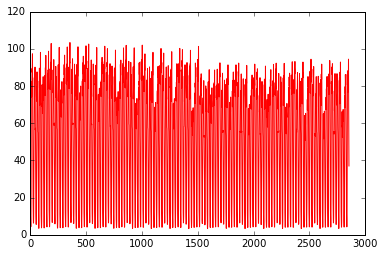

In [62]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
pre = testPredict.reshape(len(testPredict)*len(testPredict[0]),)
ori = trainY.reshape(len(trainY)*len(trainY[0]),)

plt.plot(pre,color='r')
# plt.plot(pre[-672:-336],color='b')
# plt.plot(pre[-1008:-672],color='r')
# plt.plot(pre[-1344:-1008],color='g')

# plt.plot(ori[-1008:-672],color='g')

In [ ]:
dfnhc02.columns=['a','b','c','d','e','f','g','h','i','j','k','l'];dfnhc02
dfnhc02.groupby('f').f.count()
dfnhc02.groupby('f').f.count().where((dfnhc02.groupby('f').f.count())!=24).dropna()

In [ ]:
tttty=pd.DataFrame(dfnhc01ctes)
tttty.columns=['a','b','c','d','e','f','g','h','i'];
tttty.groupby('e').e.count()
tttty.groupby('e').e.count().where((tttty.groupby('e').e.count())!=24).dropna()

In [399]:
remainder1 = len(dfnhc01)%168 
remainder2 = len(dfnhc02)%168 
print remainder1,remainder2
len(dfnhc01[:-144])/168
len(dfnhc02[:-144])/168

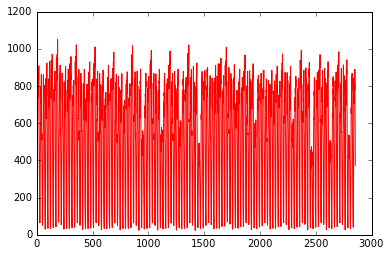

In [453]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
pre = testPredict.reshape(len(testPredict)*len(testPredict[0]),)
ori = trainY.reshape(len(trainY)*len(trainY[0]),)

plt.plot(pre,color='r')
# plt.plot(pre[-672:-336],color='b')
# plt.plot(pre[-1008:-672],color='r')
# plt.plot(pre[-1344:-1008],color='g')

# plt.plot(ori[-1008:-672],color='g')

,0,1,2,3,4,5,6,7,8
0,1.0,2.0,2.0,4.0,92.0,0.0,57.641605,1.000,219.642853
1,1.0,2.0,2.0,4.0,92.0,1.0,58.200558,0.675,126.500000
2,1.0,2.0,2.0,4.0,92.0,2.0,57.625000,0.510,72.500000
3,1.0,2.0,2.0,4.0,92.0,3.0,56.131489,0.325,50.357140
4,1.0,2.0,2.0,4.0,92.0,4.0,58.712292,0.255,35.000000
5,1.0,2.0,2.0,4.0,92.0,5.0,56.555332,0.330,45.000000
6,1.0,2.0,2.0,4.0,92.0,6.0,57.948292,0.445,76.500000
7,1.0,2.0,2.0,4.0,92.0,7.0,57.534691,1.335,294.000000
8,1.0,2.0,2.0,4.0,92.0,8.0,52.337563,5.580,770.000000
9,1.0,2.0,2.0,4.0,92.0,9.0,48.518032,7.670,937.500000


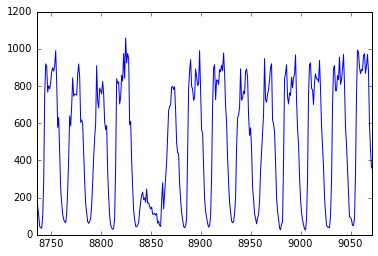

In [452]:
# gggii=pd.DataFrame(cluster01tra);
# gggii.ix[:,8].tail(300).plot()
gggii.ix[8736:,8].plot();gggii

In [442]:
9072-336

8736

In [415]:
271/30

9

In [416]:
271%30

1

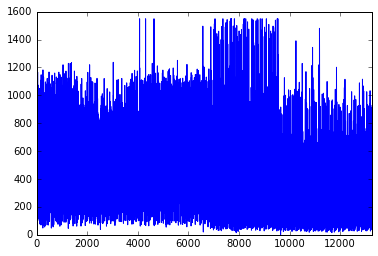

In [121]:
dfnh02 = pd.read_csv('cluster02.csv')
dfnh02c =dfnh02.copy()

alweneed =(dfnh02c['當量'].mean()+(dfnh02c['當量'].std())*3)
dfnh02c['當量'].where(dfnh02c['當量']<=alweneed,alweneed, inplace=True)
dfnh02c['當量'].plot()

In [122]:
dfnh02c

,VD編號,道路,位置,道路數,方向,日期,時間,當量,平均速度,平均佔有率,平均車間距,星期
0,VSSWC60,成功路3段,成功路3段152號前路燈桿,2,西,2016-04-01,00:00:00,402.50000,47.032550,1.960,133.500000,Fri
1,VSSWC60,成功路3段,成功路3段152號前路燈桿,2,西,2016-04-01,01:00:00,237.00000,48.069893,1.235,112.960010,Fri
2,VSSWC60,成功路3段,成功路3段152號前路燈桿,2,西,2016-04-01,02:00:00,161.00000,49.205620,0.600,107.390000,Fri
3,VSSWC60,成功路3段,成功路3段152號前路燈桿,2,西,2016-04-01,03:00:00,107.00000,47.441820,0.415,84.275000,Fri
4,VSSWC60,成功路3段,成功路3段152號前路燈桿,2,西,2016-04-01,04:00:00,87.00000,49.055620,0.265,79.600000,Fri
5,VSSWC60,成功路3段,成功路3段152號前路燈桿,2,西,2016-04-01,05:00:00,109.00000,48.425385,0.415,85.625000,Fri
6,VSSWC60,成功路3段,成功路3段152號前路燈桿,2,西,2016-04-01,06:00:00,201.00000,48.102900,1.000,124.705000,Fri
7,VSSWC60,成功路3段,成功路3段152號前路燈桿,2,西,2016-04-01,07:00:00,484.50000,44.827200,2.950,124.600000,Fri
8,VSSWC60,成功路3段,成功路3段152號前路燈桿,2,西,2016-04-01,08:00:00,1120.50000,38.746730,10.205,71.835000,Fri
9,VSSWC60,成功路3段,成功路3段152號前路燈桿,2,西,2016-04-01,09:00:00,1109.50000,37.162197,10.715,72.310000,Fri


In [125]:
def clean02(inp):
    outp = inp.ix[:,[0,3,4,5,6,8,9,10,7]].copy()
    outp.columns = ['a','b','c','d','e','f','g','h','i'];outp
    outp.replace(to_replace='東',value=1,inplace=True );outp
    outp.replace(to_replace='西',value=2,inplace=True );outp
    outp.replace(to_replace='VSSWC60',value=1,inplace=True );outp
    outp.replace(to_replace='VQKWL61',value=2,inplace=True );outp
    outp.d = pd.to_datetime(outp.d);
    outp['weekday'] = outp['d'].dt.dayofweek;outp
    outp.d= outp.d.dt.dayofyear;outp
    outp.replace(to_replace='00:00:00',value=0,inplace=True );outp
    outp.replace(to_replace='01:00:00',value=1,inplace=True );outp
    outp.replace(to_replace='02:00:00',value=2,inplace=True );outp
    outp.replace(to_replace='03:00:00',value=3,inplace=True );outp
    outp.replace(to_replace='04:00:00',value=4,inplace=True );outp
    outp.replace(to_replace='05:00:00',value=5,inplace=True );outp
    outp.replace(to_replace='06:00:00',value=6,inplace=True );outp
    outp.replace(to_replace='07:00:00',value=7,inplace=True );outp
    outp.replace(to_replace='08:00:00',value=8,inplace=True );outp
    outp.replace(to_replace='09:00:00',value=9,inplace=True );outp
    outp.replace(to_replace='10:00:00',value=10,inplace=True );outp
    outp.replace(to_replace='11:00:00',value=11,inplace=True );outp
    outp.replace(to_replace='12:00:00',value=12,inplace=True );outp
    outp.replace(to_replace='13:00:00',value=13,inplace=True );outp
    outp.replace(to_replace='14:00:00',value=14,inplace=True );outp
    outp.replace(to_replace='15:00:00',value=15,inplace=True );outp
    outp.replace(to_replace='16:00:00',value=16,inplace=True );outp
    outp.replace(to_replace='17:00:00',value=17,inplace=True );outp
    outp.replace(to_replace='18:00:00',value=18,inplace=True );outp
    outp.replace(to_replace='19:00:00',value=19,inplace=True );outp
    outp.replace(to_replace='20:00:00',value=20,inplace=True );outp
    outp.replace(to_replace='21:00:00',value=21,inplace=True );outp
    outp.replace(to_replace='22:00:00',value=22,inplace=True );outp
    outp.replace(to_replace='23:00:00',value=23,inplace=True );outp
    cols =outp.columns.tolist()
    outp= outp[cols[:3]+cols[-1:]+cols[3:-1]];outp
    outp.columns = ['a','b','c','d','e','f','g','h','i','j'];outp
    outpp = outp.values
    outpp = outpp.astype('float32')
    
    
    train_size = int(len(outpp) * 0.67)
    test_size = len(outpp) - train_size
    train, test = outpp[0:train_size,:], outpp[train_size:len(outpp),:]
    return train, test
    
    
    

In [128]:
dfnh02c1=dfnh02c.where((dfnh02c['VD編號']== 'VSSWC60')&( dfnh02c['方向']=='西')).dropna().copy();dfnh02c1
dfnh02c2=dfnh02c.where((dfnh02c['VD編號']== 'VQKWL61')&( dfnh02c['方向']=='東')).dropna().copy();dfnh02c2


dfnh02c1tra, dfnh02c1tes= clean02(dfnh02c1);
dfnh02c2tra, dfnh02c2tes= clean02(dfnh02c2);


cluster02tra = []
cluster02tes = []
#train
for elee in dfnh02c1tra.tolist():
    cluster02tra.append(elee)
for elee2 in dfnh02c2tra.tolist():
    cluster02tra.append(elee2)
cluster02tra=np.array(cluster02tra)
print len(cluster02tra)
#test
for elee3 in dfnh02c1tes.tolist():
    cluster02tes.append(elee3)
for elee4 in dfnh02c2tes.tolist():
    cluster02tes.append(elee4)
cluster02tes=np.array(cluster02tes)
print  len(cluster02tes)
    

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(0,len(dataset)-look_back-1,look_back):
        a = dataset[i:(i+look_back), 0:10]
        dataX.append(a)
        dataY.append(dataset[i + look_back:i+look_back+look_back, 9])
#     return dataX,dataY
    return np.array(dataX), np.array(dataY)


# magic number
look_back = 168
# cut off remainder
train = cluster02tra[:-(len(cluster02tra)%look_back)]
test = cluster02tes[:-(len(cluster02tes)%look_back)]
# check data lenth when cut off remainder
print(len(train), len(test))

# seperate data to input"X" and output"Y"
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
    
# create and fit Multilayer Perceptron model
model = Sequential()

# RESHAPE is  working !!!!! >0<"
model.add(Reshape((look_back*10,), input_shape=(look_back,10)))
# Add layers to neruon network
model.add(Dense(190,input_dim=(look_back*9), activation='relu'))
model.add(Dense(256, init='uniform', activation='relu'))
model.add(Dense(look_back))
model.compile(loss='mse', optimizer='adam')

model.fit(trainX, trainY, nb_epoch=168, batch_size=3, verbose=0)


# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))
    



8869
4370
(8736, 4368)
Train Score: 3829.21 MSE (61.88 RMSE)
Test Score: 63459.72 MSE (251.91 RMSE)


In [3]:
# dfnhcg=dfnhc.groupby(['VD編號','方向']);
# dfnhcgg=dfnhcg.head(168).groupby(['VD編號','方向']);
# dfnhcggm=pd.DataFrame(dfnhcgg['當量'].mean().copy());
# # dfnhcggm.plot()
# dfnhcggms=dfnhcggm.sort_values('當量').reset_index().copy();

In [4]:
# dfin=dfnhcggms.ix[:,0:2].copy();
# dfin=dfin.set_index(['VD編號', '方向']);
# dfindex = dfin.index.tolist()